In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import torch
import torch.nn as nn
from torch.utils.data import random_split
# from torchvision import models

In [3]:
%run func_DL.py

In [4]:
print(torch.cuda.is_available())

False


---

### model

### dataset

In [5]:
from torch.utils.data import Dataset, DataLoader

#---------------------------------------------
#var
path_dir_X = "../data_X"
path_dir_Y = "../data_Y_Task3"
n_test = 100
n_val = 100
batch_size = 100 #5000

#---------------------------------------------
#instance
dataset = CustomDataset(path_dir_X=path_dir_X, path_dir_Y=path_dir_Y, n_test=n_test, n_val=n_val, batch_size=batch_size)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [6]:
dataset

### var, init

In [7]:
#----------------------------
#var (condition)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#----------------------------
#var (train)
num_epochs = 1000
n_print_train_result = 1
val_flag = True

#----------------------------
#init (model)
in_channels = dataset.return_shape_X()[0]
in_length = dataset.return_shape_X()[1]
out_channels = dataset.return_shape_Y()[0]
out_length = dataset.return_shape_Y()[1]
# model = model_task3(in_channels, in_length, out_channels, out_length, batch_size).to(device)
# #init model weight
# model.apply(init_normal_dist)
#----------------------------
#init (optimizer, scheduler)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
# scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[10,30,50,100,300,500], gamma=0.95)
#----------------------------
#init (loss_func)
#https://neptune.ai/blog/pytorch-loss-functions
loss_func = nn.MSELoss()
#loss_func = nn.L1Loss()

### load model

In [8]:
#load model
#model.load_state_dict(torch.load('../models/model_task3.pth'))

In [9]:
history = {"train_loss": [], "val_loss": []}

for i, (x, y) in enumerate(dataloader):
    x = dataset.change_data_setting_to_train(x)
    y = dataset.change_data_setting_to_train(y)
    print(i,x.shape,y.shape)

0 torch.Size([100, 12, 500]) torch.Size([100, 75, 1])
1 torch.Size([100, 12, 500]) torch.Size([100, 75, 1])
2 torch.Size([100, 12, 500]) torch.Size([100, 75, 1])
3 torch.Size([100, 12, 500]) torch.Size([100, 75, 1])
4 torch.Size([100, 12, 500]) torch.Size([100, 75, 1])
5 torch.Size([100, 12, 500]) torch.Size([100, 75, 1])
6 torch.Size([100, 12, 500]) torch.Size([100, 75, 1])
7 torch.Size([100, 12, 500]) torch.Size([100, 75, 1])
8 torch.Size([100, 12, 500]) torch.Size([100, 75, 1])
9 torch.Size([100, 12, 500]) torch.Size([100, 75, 1])
10 torch.Size([100, 12, 500]) torch.Size([100, 75, 1])
11 torch.Size([100, 12, 500]) torch.Size([100, 75, 1])
12 torch.Size([100, 12, 500]) torch.Size([100, 75, 1])
13 torch.Size([100, 12, 500]) torch.Size([100, 75, 1])
14 torch.Size([100, 12, 500]) torch.Size([100, 75, 1])
15 torch.Size([100, 12, 500]) torch.Size([100, 75, 1])
16 torch.Size([100, 12, 500]) torch.Size([100, 75, 1])
17 torch.Size([100, 12, 500]) torch.Size([100, 75, 1])
18 torch.Size([100, 

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim

class TransformerModel(nn.Module):
    def __init__(self, input_features, model_dim, num_heads, num_layers, seq_length, output_dim=75):
        super(TransformerModel, self).__init__()
        self.input_embed = nn.Linear(input_features, model_dim)
        self.pos_encoder = nn.Parameter(torch.zeros(1, seq_length, model_dim))
        encoder_layers = nn.TransformerEncoderLayer(d_model=model_dim, nhead=num_heads, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers)
        self.output_layer = nn.Linear(model_dim, output_dim)

    def forward(self, src):
        # print("Input src shape:", src.shape)
        src = self.input_embed(src)
        # print("After embedding shape:", src.shape)
        src += self.pos_encoder
        # print("After pos_encoder shape:", src.shape)
        output = self.transformer_encoder(src)
        output = output.mean(dim=1)
        return self.output_layer(output)
    
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TransformerModel(input_features=12, model_dim=512, num_heads=8, num_layers=3, seq_length=500, output_dim=75).to(device)

In [11]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train_epoch(model, dataloader, optimizer, criterion, device):
    model.train()
    total_loss = 0
    for data, target in dataloader:
        data = data.transpose(1, 2).to(device).float()
        target = target.view(-1, 75).to(device).float()
        # print(f'target shape: {target.shape}')
        optimizer.zero_grad()
        output = model(data)
        # print(f' output shape: {output.shape}')
        loss = criterion(output, target)
        print(f'Loss here {loss}')
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(dataloader)

# Train the model
num_epochs = 5

for epoch in range(num_epochs):
    dataloder = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    loss = train_epoch(model, dataloader, optimizer, criterion, device)
    print(f'Epoch {epoch+1}, Loss: {loss:.4f}')

/g/g90/dhakal1/.local/lib/python3.9/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


Loss here 0.46456292271614075
Loss here 1.3211166858673096
Loss here 0.2955506145954132
Loss here 0.11894110590219498
Loss here 0.09247300773859024
Loss here 0.09909387677907944
Loss here 0.09954879432916641
Loss here 0.07687633484601974
Loss here 0.05199117586016655
Loss here 0.04532824456691742
Loss here 0.04721976816654205
Loss here 0.05191495642066002
Loss here 0.05199859291315079
Loss here 0.043428681790828705
Loss here 0.04446571320295334
Loss here 0.037715569138526917
Loss here 0.03756000101566315
Loss here 0.037824392318725586
Loss here 0.04490433260798454
Loss here 0.04073081910610199
Loss here 0.037229400128126144
Loss here 0.035998109728097916
Loss here 0.03582274541258812
Loss here 0.03434735909104347
Loss here 0.036189787089824677
Loss here 0.038265030831098557
Loss here 0.038752198219299316
Loss here 0.03694000467658043
Loss here 0.03918281942605972
Loss here 0.037651561200618744
Loss here 0.04004066064953804
Loss here 0.03560751676559448
Loss here 0.035996925085783005
Lo

In [12]:
def validate_epoch(model, dataloader, criterion, device):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for data, target in dataloader:
            data = data.transpose(1, 2).to(device).float()
            target = target.view(-1, 75).to(device).float()
            output = model(data)
            loss = criterion(output, target)
            total_loss += loss.item()
    return total_loss / len(dataloader)

# Assume validation set is part of your dataset, if not, remove validation components
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

history = {"train_loss": [], "val_loss": []}
num_epochs = 2
for epoch in range(num_epochs):
    train_loss = train_epoch(model, train_loader, optimizer, criterion, device)
    val_loss = validate_epoch(model, val_loader, criterion, device) if val_flag else None
    history["train_loss"].append(train_loss)
    if val_flag:
        history["val_loss"].append(val_loss)
    print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}' + (f', Val Loss: {val_loss:.4f}' if val_flag else ''))

Loss here 0.010173521935939789
Loss here 0.01034426037222147
Loss here 0.010076056234538555
Loss here 0.010237629525363445
Loss here 0.009206394664943218
Loss here 0.009884550236165524
Loss here 0.009870285168290138
Loss here 0.008040551096200943
Loss here 0.009565220214426517
Loss here 0.01017679926007986
Loss here 0.009740767069160938
Loss here 0.009602335281670094
Loss here 0.009549456648528576
Loss here 0.010919861495494843
Loss here 0.008574103936553001
Loss here 0.009563126601278782
Loss here 0.008711110800504684
Loss here 0.00976657960563898
Loss here 0.009520054794847965
Loss here 0.008735008537769318
Loss here 0.009559167549014091
Loss here 0.01049361377954483
Loss here 0.010950487107038498
Loss here 0.009345266036689281
Loss here 0.009148543700575829
Loss here 0.010118416510522366
Loss here 0.010247728787362576
Loss here 0.009785966947674751
Loss here 0.00970893818885088
Loss here 0.009492320008575916
Loss here 0.009935148060321808
Loss here 0.009060714393854141
Loss here 0.0

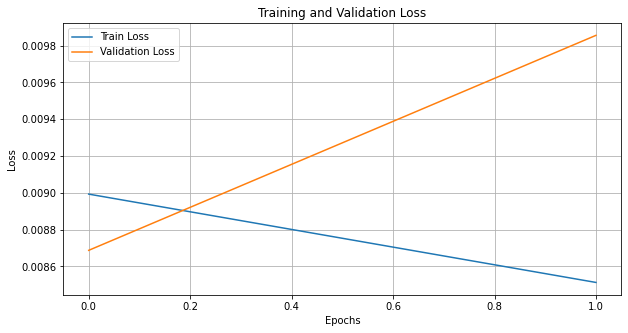

In [13]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history['train_loss'], label='Train Loss')
if val_flag:
    plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### train

### result_train

In [15]:
print(history)

{'train_loss': [0.008992875955300406, 0.008512682106811553], 'val_loss': [0.008687218927661888, 0.00985582623980008]}


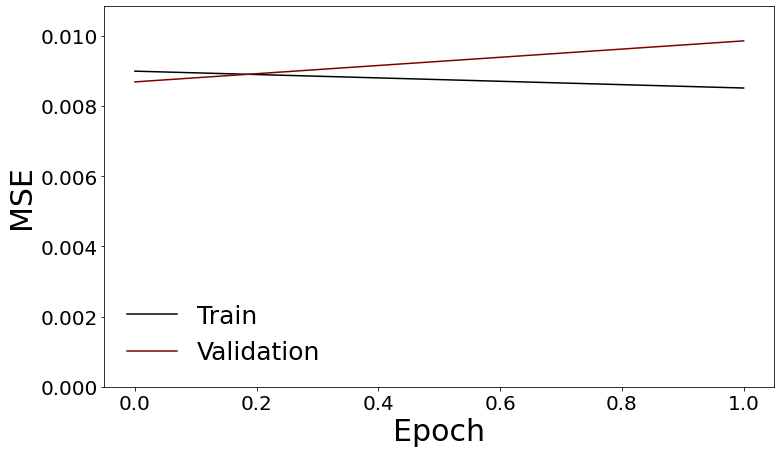

In [16]:
#----------------------------
# Assuming history["train_loss"] and history["val_loss"] are lists of floats
train_loss_tensor = torch.tensor(history["train_loss"])  # Convert list of floats to a tensor
val_loss_tensor = torch.tensor(history["val_loss"])      # Convert list of floats to a tensor

# No need to use torch.stack() if you're already creating tensors from lists directly
train_loss_np = train_loss_tensor.to('cpu').detach().numpy()
val_loss_np = val_loss_tensor.to('cpu').detach().numpy()

# Plotting the losses
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(1,1,1)
ax.plot(train_loss_np, color="black", label="Train")
ax.plot(val_loss_np, color="maroon", label="Validation")
ax.tick_params(labelsize=20)
ax.set_xlabel("Epoch", fontsize=30)
ax.set_ylabel("MSE", fontsize=30)
ax.legend(fontsize=25, frameon=False)
ax.set_ylim(0, max(max(train_loss_np), max(val_loss_np)) * 1.1)  # Set the upper limit to 10% more than the max value
plt.show()

### result_test

torch.Size([100, 12, 500])
MSE:  0.010787801
R2:  0.7001789394270008


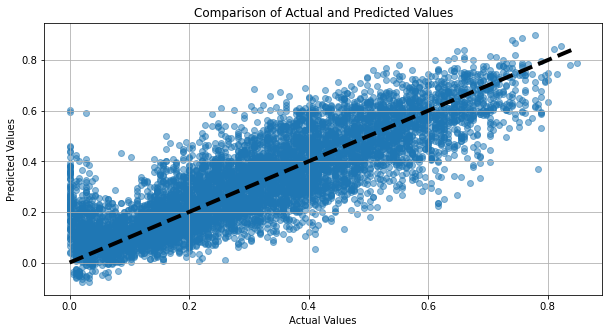

In [21]:
from matplotlib.backends.backend_pdf import PdfPages
model.eval()

with torch.no_grad():
    # Get test data
    x, y = dataset.return_test_data()  # Ensure this method exists and returns properly formatted tensors
    
    # Change the data setting if necessary (not always required)
    x = dataset.change_data_setting_to_train(x)  # Modify or ensure this method fits your data processing
    y = dataset.change_data_setting_to_train(y)
    print(x.shape)
    # Transfer tensors to the correct device
    # x = x.to(device)
    # y = y.to(device)
    x = x.transpose(1, 2).to(device).float()
    y = y.view(-1, 75).to(device).float()
    
    # Forward pass to get output/logits
    outputs = model(x)
    
    # Convert outputs to numpy for evaluation with sklearn
    outputs_np = outputs.to('cpu').detach().numpy().flatten()
    y_np = y.to('cpu').detach().numpy().flatten()
    
    # Compute metrics
    loss_MSE = mean_squared_error(y_np, outputs_np)
    loss_R2 = r2_score(y_np, outputs_np)

    # Print the losses
    print("MSE: ", loss_MSE)
    print("R2: ", loss_R2)

    # Plot the true vs. predicted values
    plt.figure(figsize=(10, 5))
    plt.scatter(y_np, outputs_np, alpha=0.5)
    plt.title('Comparison of Actual and Predicted Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.plot([y_np.min(), y_np.max()], [y_np.min(), y_np.max()], 'k--', lw=4)  # Diagonal line
    plt.show()

    # Save to PDF if needed
    with PdfPages('model_evaluation.pdf') as export_pdf:
        plt.figure()
        plt.scatter(y_np, outputs_np, alpha=0.5)
        plt.title('Actual vs Predicted')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.grid(True)
        plt.plot([y_np.min(), y_np.max()], [y_np.min(), y_np.max()], 'k--', lw=4)  # Diagonal line
        export_pdf.savefig()
        plt.close()

### plot_test (true/pred)

In [22]:
from sklearn.metrics import r2_score # スコア計算
from sklearn.metrics import mean_absolute_error # スコア計算 (MAE)
from sklearn.metrics import mean_squared_error # スコア計算 (MSE)
#----------------
def plot_true_predict_from_y(y_predict_list:pd.DataFrame, y_true_list:pd.DataFrame,
                            title:str, path_save=False) -> None:
    #----------------
    #calc score
    r = np.corrcoef(y_true_list, y_predict_list)[0][1]
    R2 = r2_score(y_true=y_true_list, y_pred=y_predict_list) # 決定係数(R2) #https://bellcurve.jp/statistics/course/9706.html
    MAE = mean_absolute_error(y_true=y_true_list, y_pred=y_predict_list) # 平均絶対誤差(MAE)
    RMSE = np.sqrt(mean_squared_error(y_true=y_true_list, y_pred=y_predict_list)) # 二乗平均平方根誤差(RMSE)
    
    #----------------
    #fig, ax
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1,1,1)
    #----------------
    #plot scatter
    #ax.scatter(x=y_predict_list, y=y_true_list, s=40, c="black", marker="o", zorder=10)
    ax.plot(y_predict_list, y_true_list, c="black", marker='.', linestyle="", ms=3, zorder=10)
    #----------------
    #plot 直線
    x=np.linspace( min(min(y_true_list),min(y_predict_list)), max(max(y_true_list),max(y_predict_list)), 10) #listの足し算は結合
    y=x
    ax.plot(x, y, color = "black")
    #----------------
    #plot text
    plt.text(x=0.5, y=0.94, 
             s="$r$={0}, $R^2$={1}, $MAE$={2}, $RMSE$={3}".format("{:.2f}".format(r),
                                                                 "{:.2f}".format(R2),
                                                                "{:.2f}".format(MAE),
                                                                "{:.2f}".format(RMSE)), 
             fontdict=dict(fontsize=25, color="black"), ha='center', transform=ax.transAxes,
             zorder=20)
    #----------------
    #setting
    ax.tick_params(labelsize = 20)#軸の大きさ
    ax.set_xlabel("True",fontsize=30)
    ax.set_ylabel("Predict",fontsize=30)
    plt.title("{0}".format(title), fontsize=30)
    #----------------
    #save
    if path_save != False:
        plt.savefig(path_save, bbox_inches='tight')
    #----------------
    #show
    plt.show()

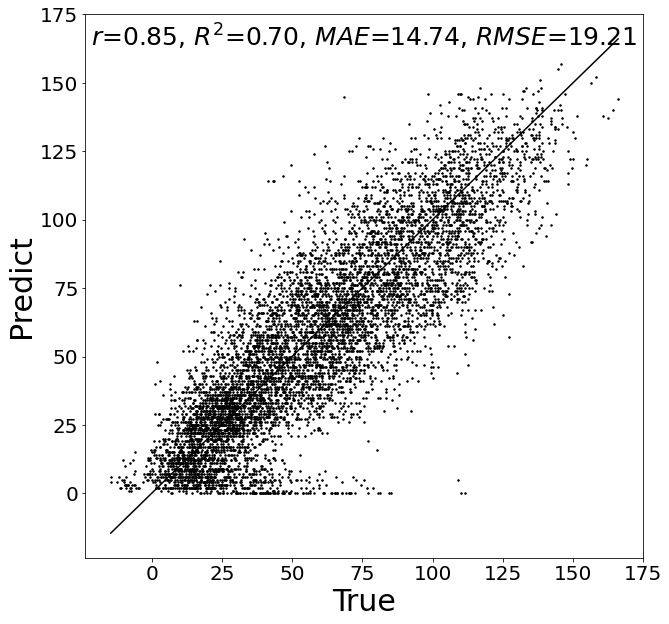

In [24]:
#----------------------------
# eval
model.eval()
with torch.no_grad():
    #----------------------------
    #forward
    x, y = dataset.return_test_data()
    #----------------------------
    #float32, grad==True
    x = dataset.change_data_setting_to_train(x)
    y = dataset.change_data_setting_to_train(y)
    #----------------------------
    #change the type
    # x = x.to(device)
    # y = y.to(device)
    x = x.transpose(1, 2).to(device).float()
    y = y.view(-1, 75).to(device).float()
    #----------------------------
    #forward
    output = model(x)
    #----------------------------
    #change to numpy
    output = output.to('cpu').detach().numpy().copy().flatten() * 185
    y = y.to('cpu').detach().numpy().copy().flatten() * 185
    #----------------------------
    #plot
    plot_true_predict_from_y(y_predict_list=output, y_true_list=y, title="", path_save=False) 

### plot_test (sample_all)

In [25]:
def plot_VmDatas_Task3_all(ActTime, title):
    # plot the Activation Time array
    plt.imshow(ActTime, cmap='jet', interpolation='nearest', aspect='auto')
    plt.title('Activation Time')
    cbar = plt.colorbar()
    plt.grid(visible=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    # not xticks
    #plt.xticks([])
    plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    plt.title("{0}".format(title), fontsize=20)
    plt.xlabel("Test data ID",fontsize=15)
    plt.ylabel("Number of Activation Map",fontsize=15)
    cbar.set_label('Activation Time', fontsize=15, rotation=270, labelpad=15)
    plt.show()

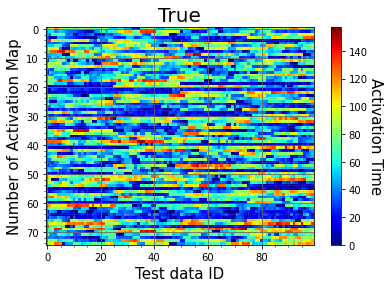

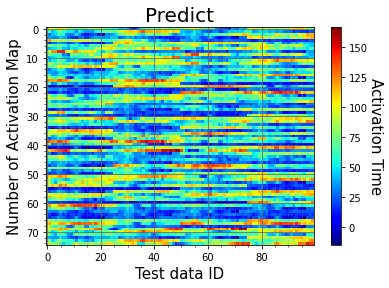

In [26]:
#var
n_plot = 3

#----------------------------
# eval
model.eval()
with torch.no_grad():
    #----------------------------
    #forward
    x, y = dataset.return_test_data()
    #----------------------------
    #float32, grad==True
    x = dataset.change_data_setting_to_train(x)
    y = dataset.change_data_setting_to_train(y)
    #----------------------------
    #change the type
    # x = x.to(device)
    # y = y.to(device)
    x = x.transpose(1, 2).to(device).float()
    y = y.view(-1, 75).to(device).float()
    #----------------------------
    #forward
    output = model(x)
    #----------------------------
    #change to numpy
    output = output.to('cpu').view(75, dataset.return_n_test()).detach().numpy().copy() * 185
    y = y.to('cpu').view(75, dataset.return_n_test()).detach().numpy().copy() * 185
    #----------------------------
    #plot
    plot_VmDatas_Task3_all(y, title="True")
    plot_VmDatas_Task3_all(output, title="Predict")

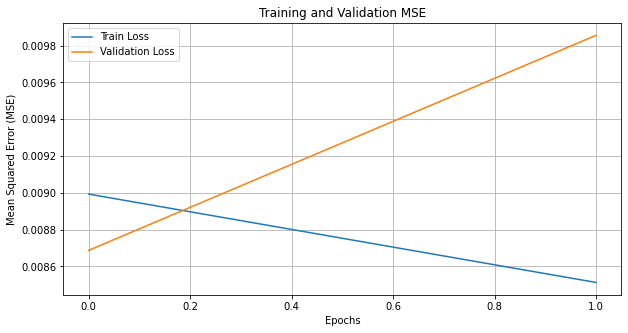

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()

### plot_test (sample_each)

### save model

In [ ]:
#https://wandb.ai/wandb/common-ml-errors/reports/How-to-Save-and-Load-Models-in-PyTorch--VmlldzozMjg0MTE
#save model
#torch.save(model.state_dict(), '../models/model_task3.pth')

---

# Test (CustomDataset)

In [ ]:
import os, random
from torch.utils.data import Dataset, DataLoader
from typing import Union

#---------------------------------------------
# custom dataset
#https://discuss.pytorch.org/t/custom-data-loader-for-big-data/129361
class CustomDataset(Dataset):
    def __init__(self, path_dir_X:str, path_dir_Y:str, n_test:Union[int,float], n_val:Union[int,float], batch_size:int): # n_test -> float:ratio of test, int:number of test
        #-----------------
        # batch_size
        self.batch_size = batch_size
        # path_dir_X, path_dir_Y
        self.path_dir_X = path_dir_X
        self.path_dir_Y = path_dir_Y
        # list_file_name_all
        self.list_file_name_all = os.listdir(path_dir_X)
        # n_data_all
        self.n_data_all = len(self.list_file_name_all)
        #check
        if len(os.listdir(path_dir_X)) != len(os.listdir(path_dir_Y)):
            raise ValueError("error!!!")
        if len(set(os.listdir(path_dir_X)) - set(os.listdir(path_dir_Y))) != 0:
            raise ValueError("error!!!")
        #-----------------
        # suffle
        random.shuffle(self.list_file_name_all)
        #-----------------
        # n_test
        if type(n_test)==int:
            self.n_test = n_test
        elif type(n_test)==float:
            self.n_test = int(len(self.list_file_name_all)*n_test)
        else:
            raise ValueError("error!!!")
        # n_val
        if type(n_val)==int:
            self.n_val = n_val
        elif type(n_val)==float:
            self.n_val = int(len(self.list_file_name_all)*n_val)
        else:
            raise ValueError("error!!!")
        #check
        if self.n_data_all <= self.n_test+self.n_val:
            raise ValueError("error!!!")
        #-----------------
        # list_file_name_test / _val / _train
        self.list_file_name_test = self.list_file_name_all[:self.n_test]
        self.list_file_name_val = self.list_file_name_all[self.n_test:self.n_test+self.n_val]
        self.list_file_name_train = self.list_file_name_all[self.n_test+self.n_val:]
        
    def __len__(self):
        return len(self.list_file_name_train)
    
    def __getitem__(self, x):
        return self.getdata(list_file_name=self.list_file_name_train, index=x)
    
    def getdata(self, list_file_name, index):
        #file_name
        file_name = list_file_name[index]
        #data_X
        path_file_X = "{0}/{1}".format(self.path_dir_X, file_name)
        data_X = np.load(path_file_X, allow_pickle=True)
        data_X = torch.from_numpy(data_X).to(torch.float32)
        #data_Y
        path_file_Y = "{0}/{1}".format(self.path_dir_Y, file_name)
        data_Y = np.load(path_file_Y, allow_pickle=True)
        data_Y = torch.from_numpy(data_Y).to(torch.float32)
        #return
        return data_X, data_Y
    
    def return_n_data_all(self):
        return self.n_data_all
    
    def return_n_test(self):
        return self.n_test
    
    def return_n_val(self):
        return self.n_val
    
    def return_n_train(self):
        return self.n_data_all - self.n_val - self.n_test
    
    def return_batch_size(self):
        return self.batch_size
    
    def return_shape_X(self):
        data_sample = self.getdata(self.list_file_name_all, 0)[0]
        return data_sample.shape
    
    def return_shape_Y(self):
        data_sample = self.getdata(self.list_file_name_all, 0)[1]
        return data_sample.shape
    
    def return_test_data(self):
        #https://www.tutorialspoint.com/how-to-join-tensors-in-pytorch
        data_X_test = torch.stack([self.getdata(self.list_file_name_test, i)[0] for i in range(self.n_test)])
        data_Y_test = torch.stack([self.getdata(self.list_file_name_test, i)[1] for i in range(self.n_test)])
        return data_X_test, data_Y_test
    
    def return_val_data(self):
        #https://www.tutorialspoint.com/how-to-join-tensors-in-pytorch
        data_X_val = torch.stack([self.getdata(self.list_file_name_val, i)[0] for i in range(self.n_val)])
        data_Y_val = torch.stack([self.getdata(self.list_file_name_val, i)[1] for i in range(self.n_val)])
        return data_X_val, data_Y_val


#---------------------------------------------
#var
path_dir_X = "../data_X"
path_dir_Y = "../data_Y_Task3"
n_test = 100
n_val = 100
batch_size = 10000

#---------------------------------------------
#instance
dataset = CustomDataset(path_dir_X=path_dir_X, path_dir_Y=path_dir_Y, n_test=n_test, n_val=n_val, batch_size=batch_size)
dataloder = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [ ]:
for i, (data_X, data_Y) in enumerate(dataloder):
   # print(data_X.shape, data_Y.shape)
   print(data_Y)

In [ ]:
dataset.return_n_data_all()

In [ ]:
dataset.return_n_test()

In [ ]:
dataset.return_n_val()

In [ ]:
dataset.return_val_data()[1].shape

In [ ]:
dataset.return_test_data()[1].shape

In [ ]:
x,y = dataset.return_val_data()

---